In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Grocer Genuis\Train (1).csv")

#### Exploring the dataset

In [5]:
# Display first few rows
print(df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

#### 2 . Check data types and missing values using info() method

In [7]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [9]:
missing_data = df.isnull().sum()
print('Missing values per column:')
print(missing_data)

Missing values per column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [11]:
# Summary statistics for numerical columns
print(df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


#### 1. Identifying the categorical columns

In [15]:
# Unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique values in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique values in Outlet_Size: ['Medium' nan 'High' 'Small']
Unique values in Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Unique values in Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### 2. Plotting histogram of continuos variables

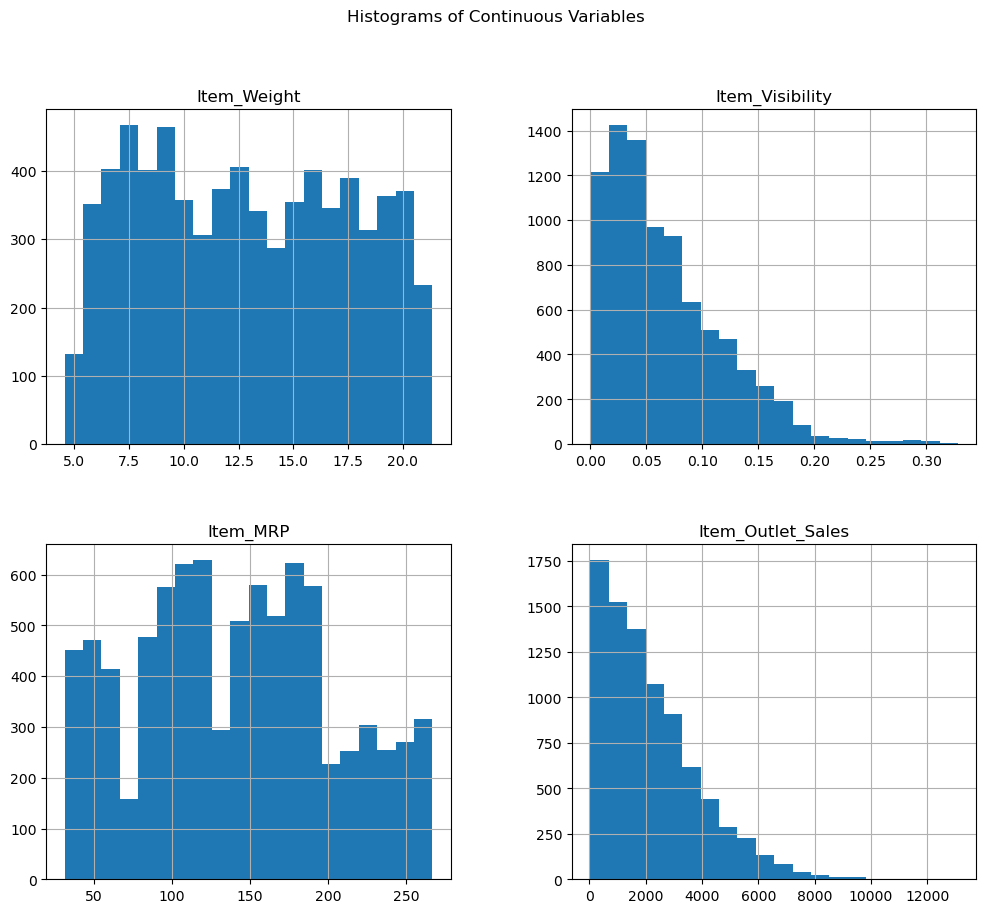

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the continuous columns
continuous_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# 1. Histograms
df[continuous_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

### Overall Observations

##### Item Weight: The majority of items have weights clustered around the mean, with a relatively small number of items having significantly lower or higher weights.
##### Item Visibility: Most items have low visibility, with a few items having high visibility. This could indicate that there are some popular items that are more prominently displayed.
##### Item MRP: The multimodal distribution of item MRP suggests that the items are priced in different categories or segments.
##### Item Outlet_Sales: The right-skewed distribution of item outlet sales indicates that most items have low sales, with a few items being significantly more popular.

#### 4 . Pair plot of continous columns

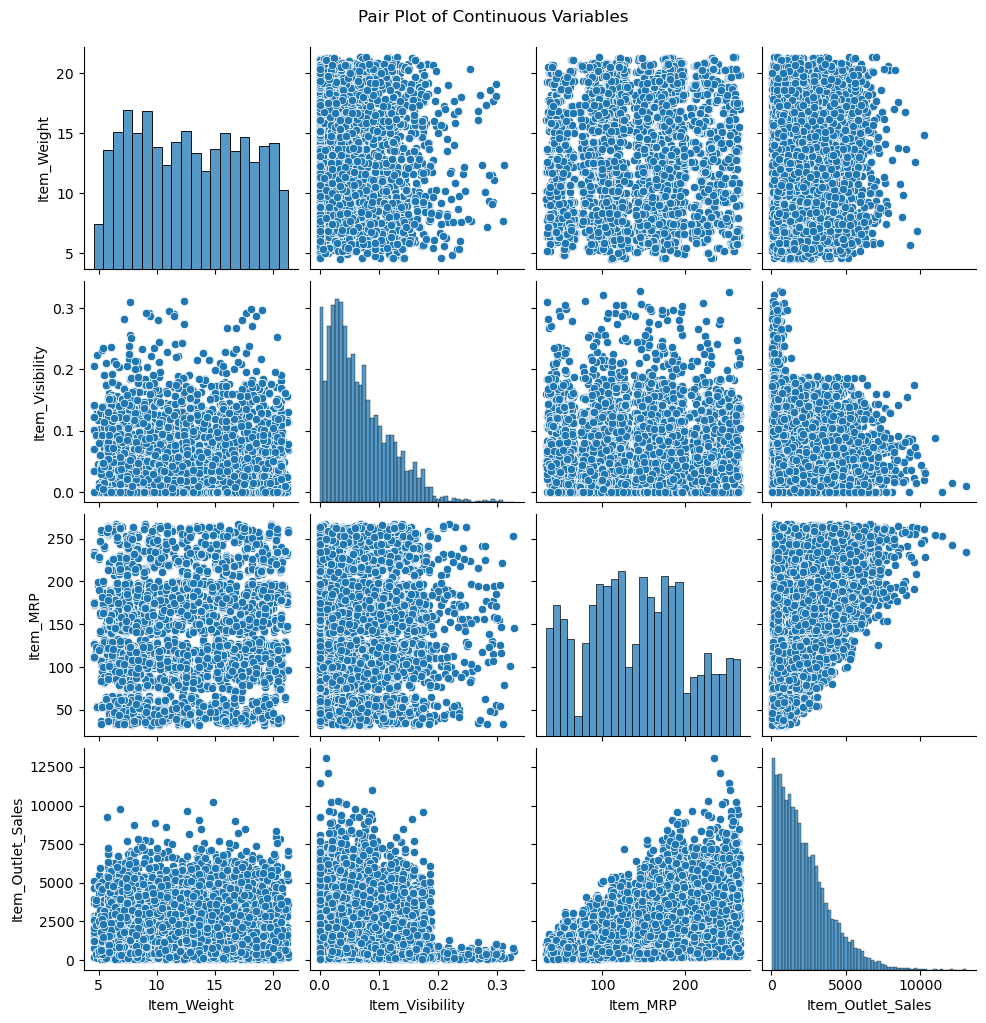

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# 3. Pair Plot
sns.pairplot(df[continuous_cols])
plt.suptitle('Pair Plot of Continuous Variables', y=1.02)
plt.show()